In [ ]:
# Redes Neurais

In [1]:
# Processamento dos dados
import numpy  as np
import pandas as pd

In [2]:
# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [3]:
# Seleção dos modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [4]:
# Armazenamento externo de arquivos
from sklearn.externals import joblib

In [5]:
# Métricas de avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

## Carregamento dos datasets balanceados

In [6]:
# Conjuntos de treinamento
# Conjunto 1
conjunto1_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_1.csv')
conjunto1_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_1.csv')

# Conjunto 2
conjunto2_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_2.csv')
conjunto2_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_2.csv')

# Conjunto 3
conjunto3_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_3.csv')
conjunto3_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_3.csv')

# Conjunto 4
conjunto4_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_4.csv')
conjunto4_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_4.csv')

In [7]:
# Conjuntos de teste
# Conjunto 1
conjunto1_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_1.csv')
conjunto1_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_1.csv')

# Conjunto 2
conjunto2_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_2.csv')
conjunto2_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_2.csv')

# Conjunto 3
conjunto3_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_3.csv')
conjunto3_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_3.csv')

# Conjunto 4
conjunto4_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_4.csv')
conjunto4_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_4.csv')

## Carregamento dos datasets desbalanceados

In [8]:
# Leitura dos Datasets desbalanceados

# Conjuntos de treinamento

# Conjunto 1
conjunto1_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_1.csv')
conjunto1_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_1.csv')

# Conjunto 2
conjunto2_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_2.csv')
conjunto2_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_2.csv')

# Conjunto 3
conjunto3_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_3.csv')
conjunto3_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_3.csv')

# Conjunto 4
conjunto4_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_4.csv')
conjunto4_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_4.csv')

In [9]:
# Conjuntos de teste
# Conjunto 1
conjunto1_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_1.csv')
conjunto1_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_1.csv')

# Conjunto 2
conjunto2_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_2.csv')
conjunto2_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_2.csv')

# Conjunto 3
conjunto3_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_3.csv')
conjunto3_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_3.csv')

# Conjunto 4
conjunto4_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_4.csv')
conjunto4_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_4.csv')

## Pré-processamento dos dados

### Remoção de colunas inúteis

In [10]:
# Lista de csvs
df_data_balanceado        = [conjunto1_train, conjunto2_train ,conjunto3_train ,conjunto4_train,
                               conjunto1_test, conjunto2_test  ,conjunto3_test  ,conjunto4_test]

df_target_balanceado      = [conjunto1_train_target, conjunto2_train_target, conjunto3_train_target, conjunto4_train_target,
                              conjunto1_test_target, conjunto2_test_target , conjunto3_test_target , conjunto4_test_target]

df_data_desbalanceado     = [conjunto1_train_desbalanceado, conjunto2_train_desbalanceado, conjunto3_train_desbalanceado, conjunto4_train_desbalanceado,
                              conjunto1_test_desbalanceado,  conjunto2_test_desbalanceado,  conjunto3_test_desbalanceado, conjunto4_test_desbalanceado]

df_target_desbalanceado   = [conjunto1_train_target_desbalanceado, conjunto2_train_target_desbalanceado, conjunto3_train_target_desbalanceado, conjunto4_train_target_desbalanceado,
                              conjunto1_test_target_desbalanceado,  conjunto2_test_target_desbalanceado,  conjunto3_test_target_desbalanceado, conjunto4_test_target_desbalanceado]

In [11]:
# Remoção das colunas ids
for df_index in range(0,8):
    # Dataset balanceado
    df_data_balanceado[df_index].drop('id',axis=1,inplace=True)
    df_target_balanceado[df_index].drop('id',axis=1,inplace=True)
    
    # Dataset desbalanceado
    df_data_desbalanceado[df_index].drop('id',axis=1,inplace=True)
    df_target_desbalanceado[df_index].drop('id',axis=1,inplace=True)

In [12]:
# Transformação das features categóricas em dummy variables, utilizando get_dummies

def get_dummies_features(df):
    ''' Função utilizada para a codificação de features categóricas de um dataframe em features binárias'''
    output = pd.DataFrame(index = df.index)

    # Verifica cada feature, transformando somente as features categóricas/object
    for col, col_data in df.iteritems():

        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        output = output.join(col_data)
    
    return output

In [13]:
# Convertendo as features presentes no dataframes em dummies :

# Datasets balanceados
# Conjunto de treinamento
conjunto1_train = get_dummies_features(conjunto1_train)
conjunto2_train = get_dummies_features(conjunto2_train)
conjunto3_train = get_dummies_features(conjunto3_train)
conjunto4_train = get_dummies_features(conjunto4_train)

# Conjunto de teste
conjunto1_test = get_dummies_features(conjunto1_test)
conjunto2_test = get_dummies_features(conjunto2_test) 
conjunto3_test = get_dummies_features(conjunto3_test)
conjunto4_test = get_dummies_features(conjunto4_test)

# Datasets desbalanceados
conjunto1_train_desbalanceado = get_dummies_features(conjunto1_train_desbalanceado)
conjunto2_train_desbalanceado = get_dummies_features(conjunto2_train_desbalanceado)
conjunto3_train_desbalanceado = get_dummies_features(conjunto3_train_desbalanceado)
conjunto4_train_desbalanceado = get_dummies_features(conjunto4_train_desbalanceado)

# Conjunto de teste
conjunto1_test_desbalanceado = get_dummies_features(conjunto1_test_desbalanceado)
conjunto2_test_desbalanceado = get_dummies_features(conjunto2_test_desbalanceado) 
conjunto3_test_desbalanceado = get_dummies_features(conjunto3_test_desbalanceado)
conjunto4_test_desbalanceado = get_dummies_features(conjunto4_test_desbalanceado)

In [14]:
conjunto1_train_target = conjunto1_train_target.earnings.replace(-1,0).values
conjunto2_train_target = conjunto2_train_target.earnings.replace(-1,0).values
conjunto3_train_target = conjunto3_train_target.earnings.replace(-1,0).values
conjunto4_train_target = conjunto4_train_target.earnings.replace(-1,0).values
                              
conjunto1_test_target = conjunto1_test_target.earnings.replace(-1,0).values
conjunto2_test_target = conjunto2_test_target.earnings.replace(-1,0).values
conjunto3_test_target = conjunto3_test_target.earnings.replace(-1,0).values
conjunto4_test_target = conjunto4_test_target.earnings.replace(-1,0).values

conjunto1_train_target_desbalanceado = conjunto1_train_target_desbalanceado.earnings.replace(-1,0).values
conjunto2_train_target_desbalanceado = conjunto2_train_target_desbalanceado.earnings.replace(-1,0).values
conjunto3_train_target_desbalanceado = conjunto3_train_target_desbalanceado.earnings.replace(-1,0).values
conjunto4_train_target_desbalanceado = conjunto4_train_target_desbalanceado.earnings.replace(-1,0).values

conjunto1_test_target_desbalanceado = conjunto1_test_target_desbalanceado.earnings.replace(-1,0).values
conjunto2_test_target_desbalanceado = conjunto2_test_target_desbalanceado.earnings.replace(-1,0).values
conjunto3_test_target_desbalanceado = conjunto3_test_target_desbalanceado.earnings.replace(-1,0).values
conjunto4_test_target_desbalanceado = conjunto4_test_target_desbalanceado.earnings.replace(-1,0).values

In [15]:
def validation_graph_acc(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    train_scores_mean = np.mean(scores_treino   , axis=1)
    train_scores_std  = np.std (scores_treino   , axis=1)
    test_scores_mean  = np.mean(scores_validacao, axis=1)
    test_scores_std   = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('Acurácia para n árvores',fontsize=20)
    plt.xlabel('Quantidade de árvores',fontsize=20)
    plt.ylabel('Acurácia',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, train_scores_mean, label="Acurácia no treinamento",color="darkorange", lw=lw)
    plt.fill_between(param_range, (train_scores_mean - train_scores_std),(train_scores_mean + train_scores_std), alpha=0.2,color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Acurácia na validação cruzada",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.legend(loc="best",fontsize='xx-large')
    plt.show()

In [16]:
def validation_graph_roc(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    train_scores_mean = np.mean(scores_treino   , axis=1)
    train_scores_std  = np.std (scores_treino   , axis=1)
    test_scores_mean  = np.mean(scores_validacao, axis=1)
    test_scores_std   = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('ROC AUC para n árvores ',fontsize=20)
    plt.xlabel('Quantidade de árvores',fontsize=20)
    plt.ylabel('ROC AUC',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, train_scores_mean, label="Acurácia no treinamento",color="darkorange", lw=lw)
    plt.fill_between(param_range, (train_scores_mean - train_scores_std),(train_scores_mean + train_scores_std), alpha=0.2,color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="ROC AUC na validação cruzada",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.legend(loc="best",fontsize='xx-large')
    plt.show()

In [17]:
def validation_graph_f1(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    train_scores_mean = np.mean(scores_treino   , axis=1)
    train_scores_std  = np.std (scores_treino   , axis=1)
    test_scores_mean  = np.mean(scores_validacao, axis=1)
    test_scores_std   = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('F1-score para n árvores ',fontsize=20)
    plt.xlabel('Quantidade de árvores',fontsize=20)
    plt.ylabel('F1-score',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, train_scores_mean, label="Acurácia no treinamento",color="darkorange", lw=lw)
    plt.fill_between(param_range, (train_scores_mean - train_scores_std),(train_scores_mean + train_scores_std), alpha=0.2,color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Score F1 na validação cruzada",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.legend(loc="best",fontsize='xx-large')
    plt.show()
    

## Redes neurais

Para a utilização da rede neural como um classificador, devemos definir alguns parâmetros, tais como a quantidade de camadas escondidas, a quantidade de neurônios em cada camada escondida, a quantidade de nós na saída e a função erro a ser utilizada. Os seguintes parâmetros foram escolhidos:

- Neurônios na saída: sigmoid, 1 neurônio
- Função de ativação: ReLU
- Função erro: Entropia cruzada

O treinamento da rede neural é feito utilizando o pacote Keras em conjunto com o tensorflow.


In [38]:
from sklearn.neural_network import MLPClassifier 

# Definindo os parâmetros do modelo e possíveis valores

# param_grid_one = {'hidden_layer_sizes': list(zip(map(int,np.logspace(start=1,stop=7,num=7,base=2)))), 
#                   'alpha': list(np.logspace(start=-4,stop=1,num=6,base=10))}

# param_grid_one = {'hidden_layer_sizes': [1, 10, 100, 1000], 
#                   'alpha': list(np.logspace(start=-6,stop=-6,num=1,base=10))}

param_grid_one = {'hidden_layer_sizes': list(zip(map(int,np.logspace(start=1,stop=10,num=10,base=2)))), 
                  'alpha': [0]}

# param_grid_one = {'hidden_layer_sizes': list(zip(map(int,np.logspace(start=1,stop=10,num=10,base=2)))), 
#                   'alpha': list(np.logspace(start=-6,stop=-6,num=1,base=10))}

# print(param_grid_one)

param_grid_two = {'hidden_layer_sizes': [ (a,b) for a in list(map(int,np.logspace(start=1,stop=7,num=7,base=2))) for b in list(map(int,np.logspace(start=1,stop=7,num=7,base=2))) ],
                  'alpha': list(np.logspace(start=-4,stop=1,num=6,base=10))}

# print(param_grid_two)

mlp = MLPClassifier(activation='logistic',batch_size=16, max_iter=10000, solver='sgd', learning_rate_init=0.01)

# Validação cruzada com cada conjunto de parâmetros

clf_one = GridSearchCV(mlp,param_grid_one,return_train_score=True,cv=10,
                   scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1', 'average_precision'], refit=False, n_jobs=-1)
              
clf_two = GridSearchCV(mlp,param_grid_two,return_train_score=True,cv=10,
                   scoring = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1', 'average_precision'], refit=False, n_jobs=-1)

In [39]:
clf_one.fit(conjunto2_train_desbalanceado, conjunto2_train_target_desbalanceado)

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(2,), (4,), (8,), (16,), (32,), (64,), (128,), (256,), (512,), (1024,)], 'alpha': [0]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score=True,
       scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1', 'average_precision'],
       verbose=0)

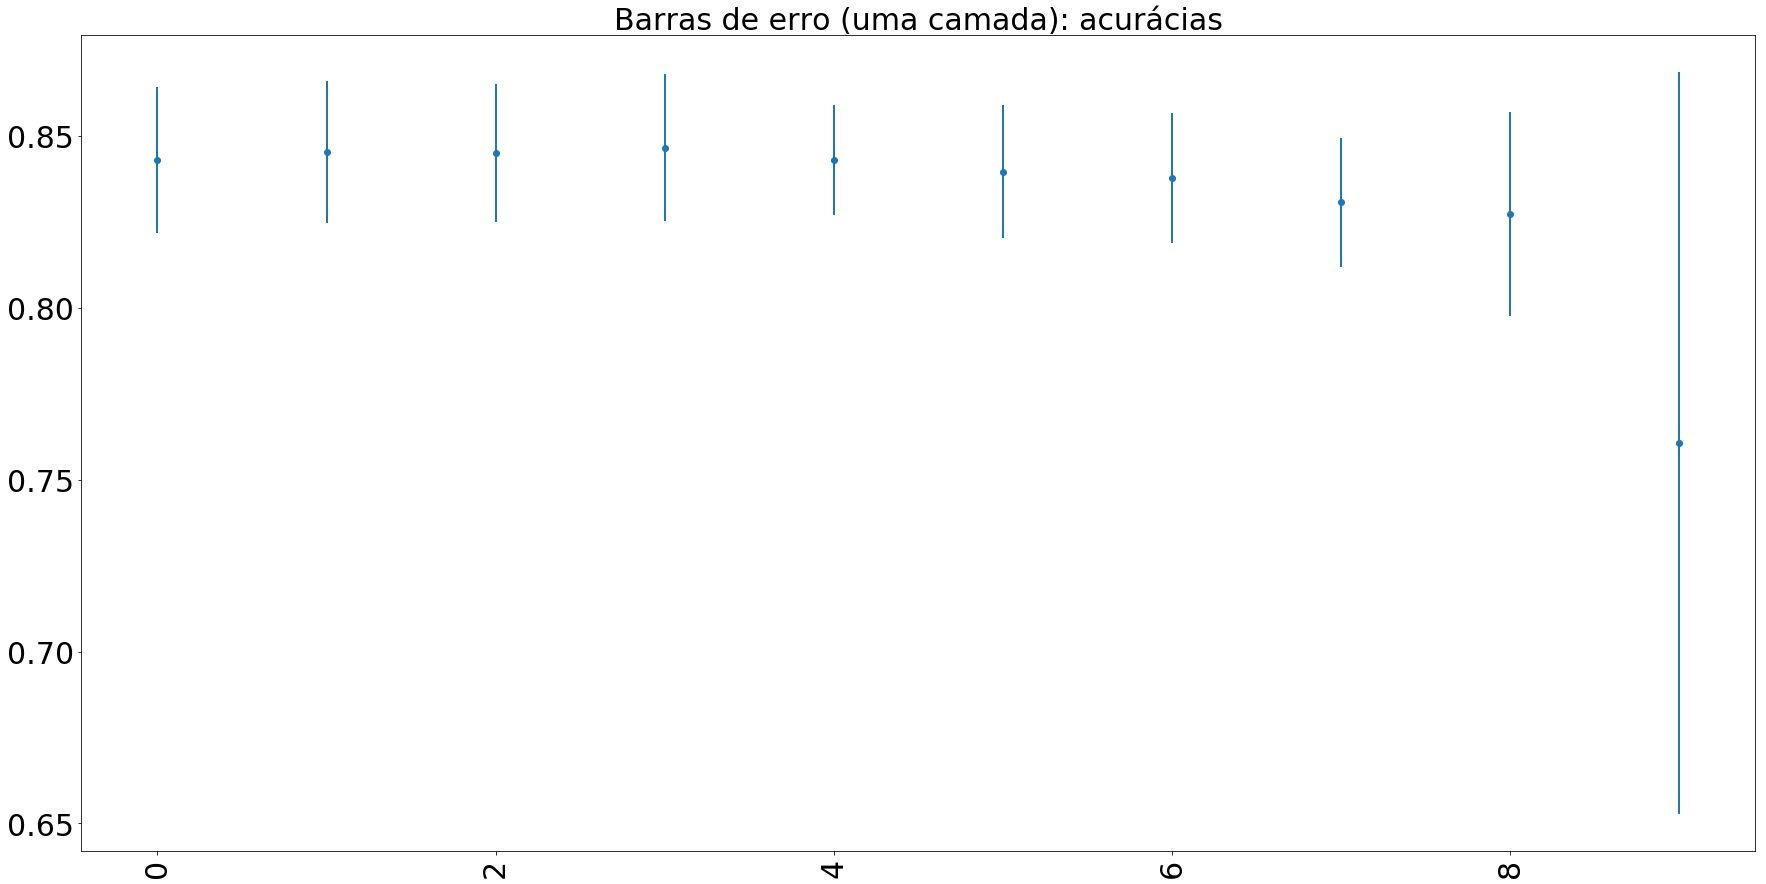

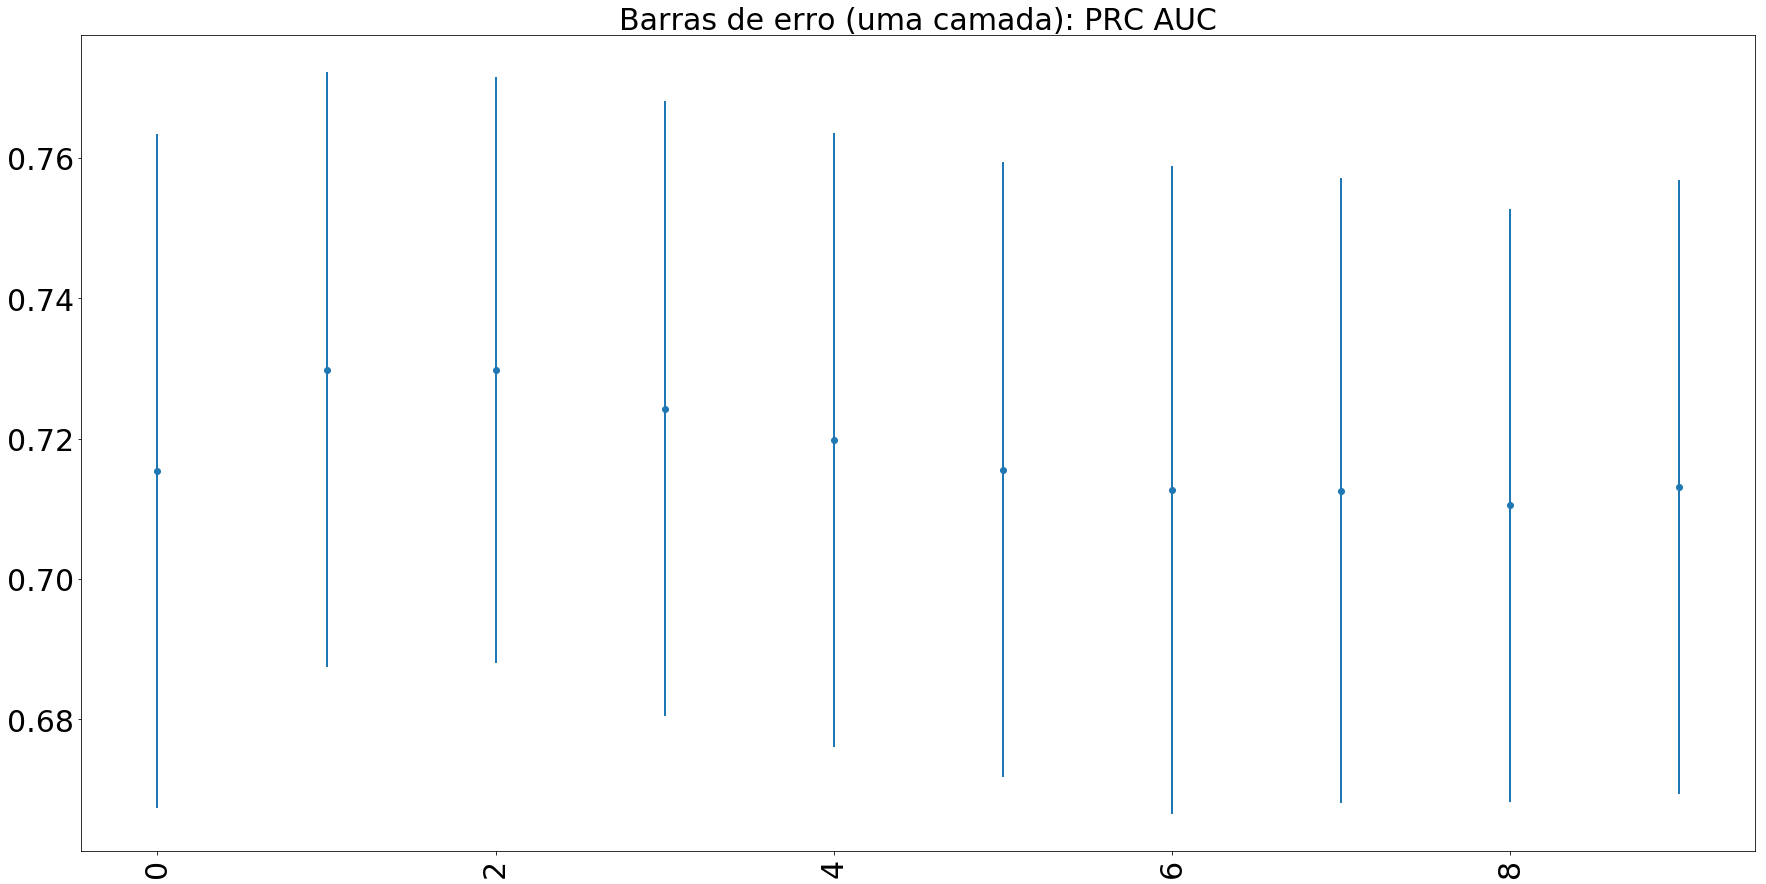

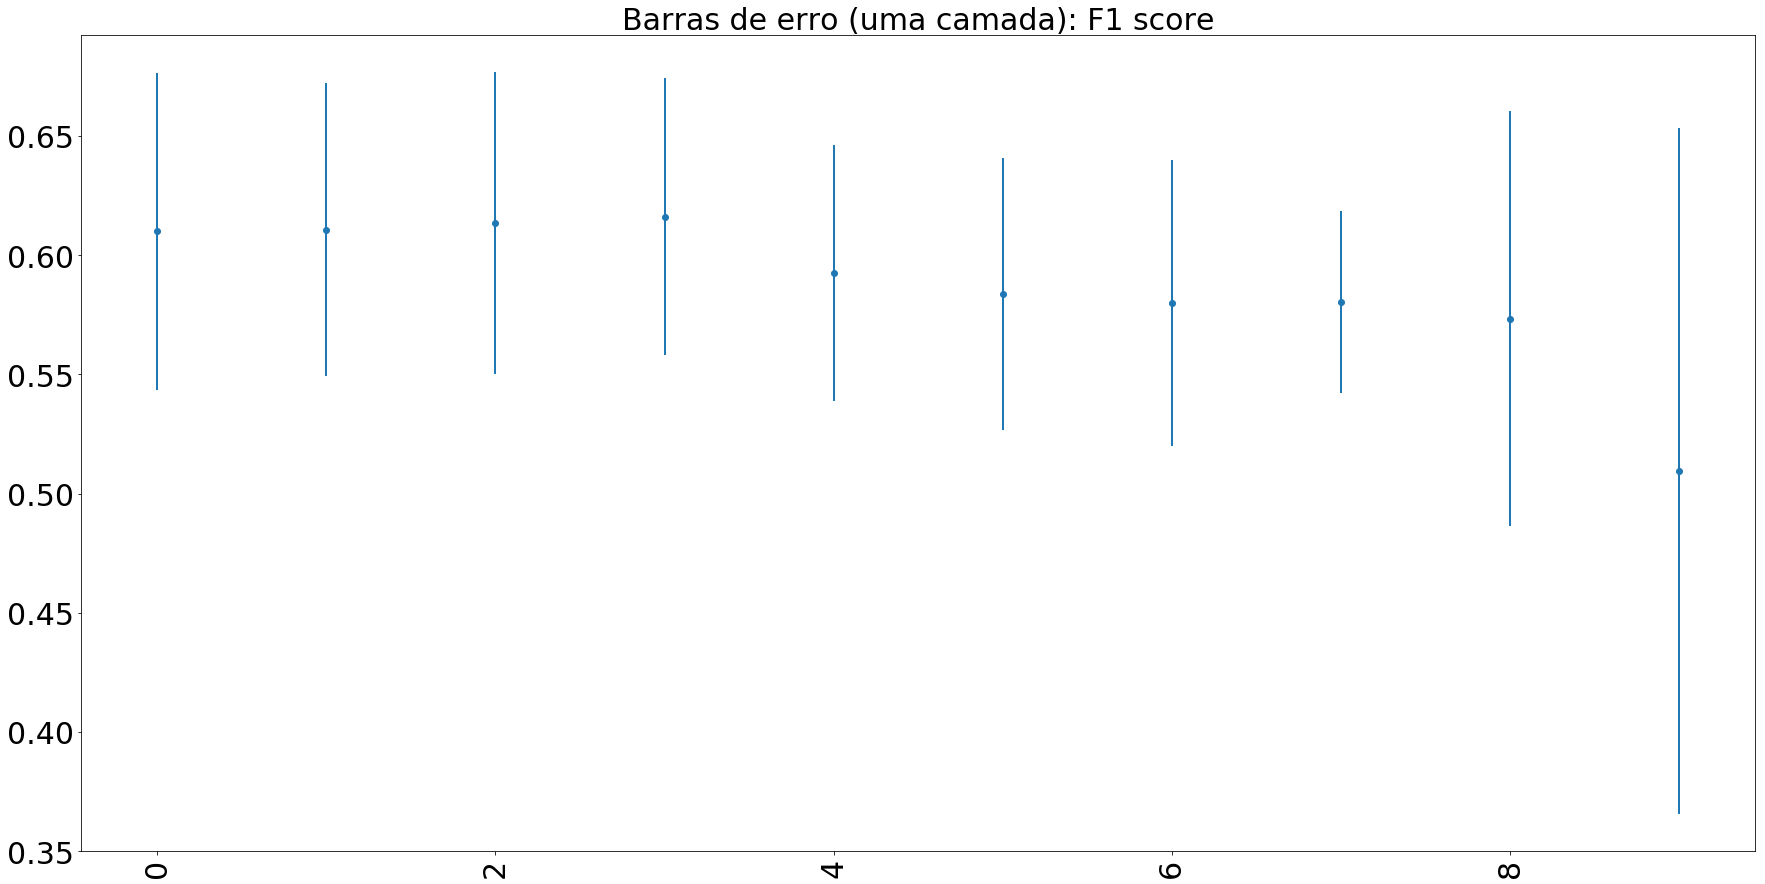

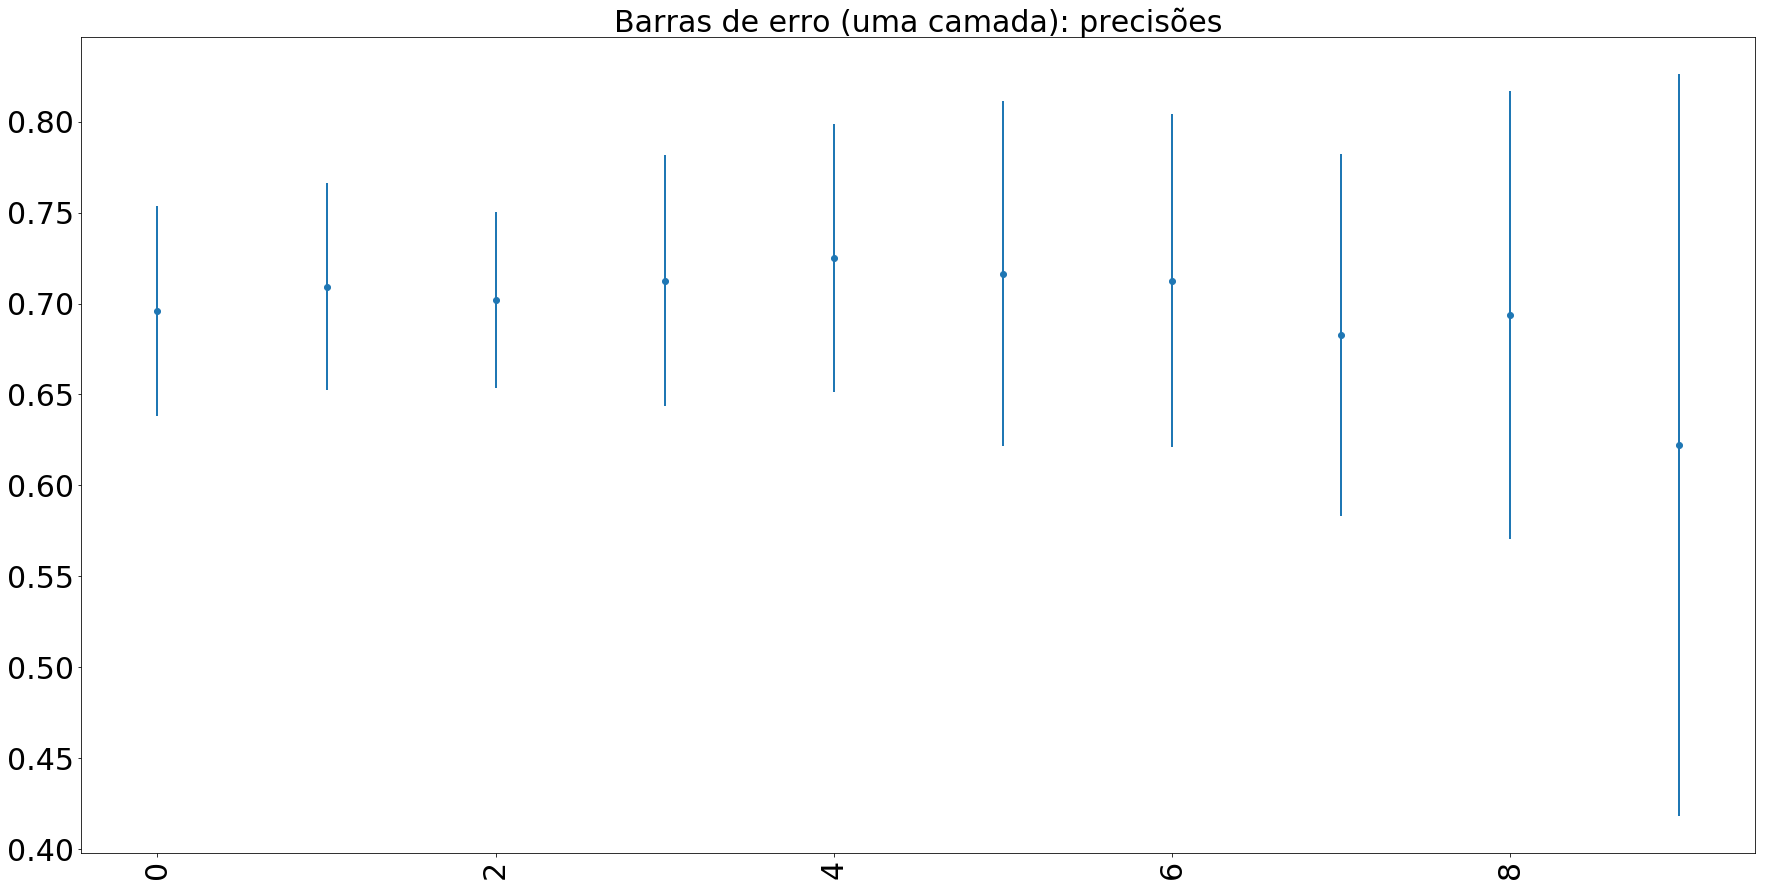

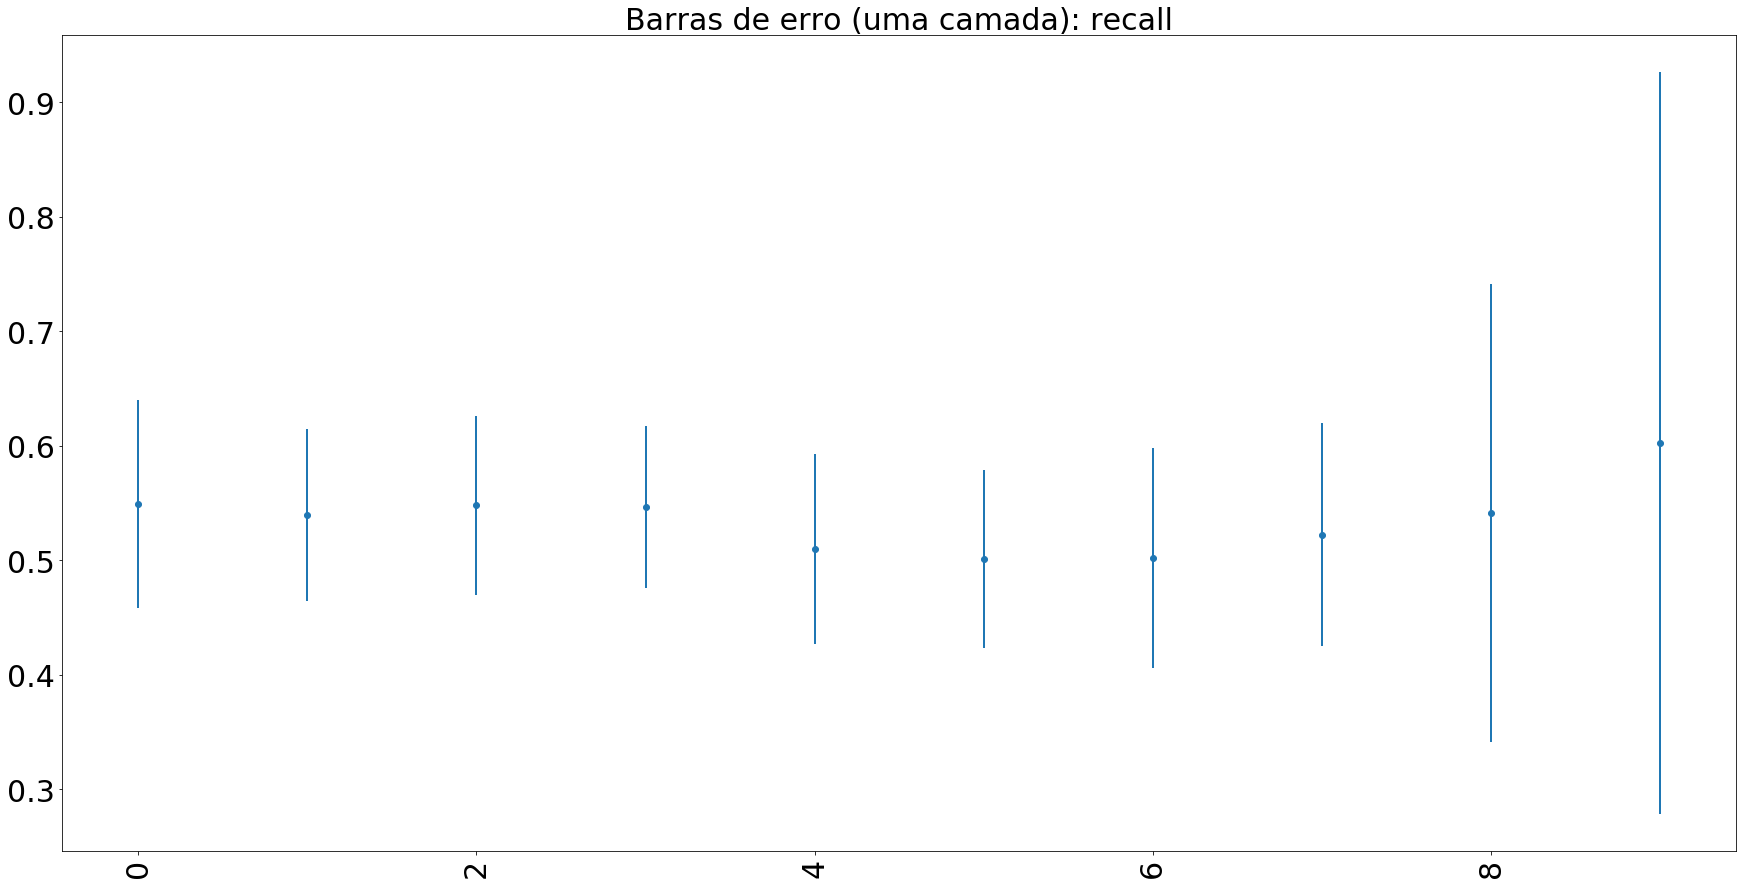

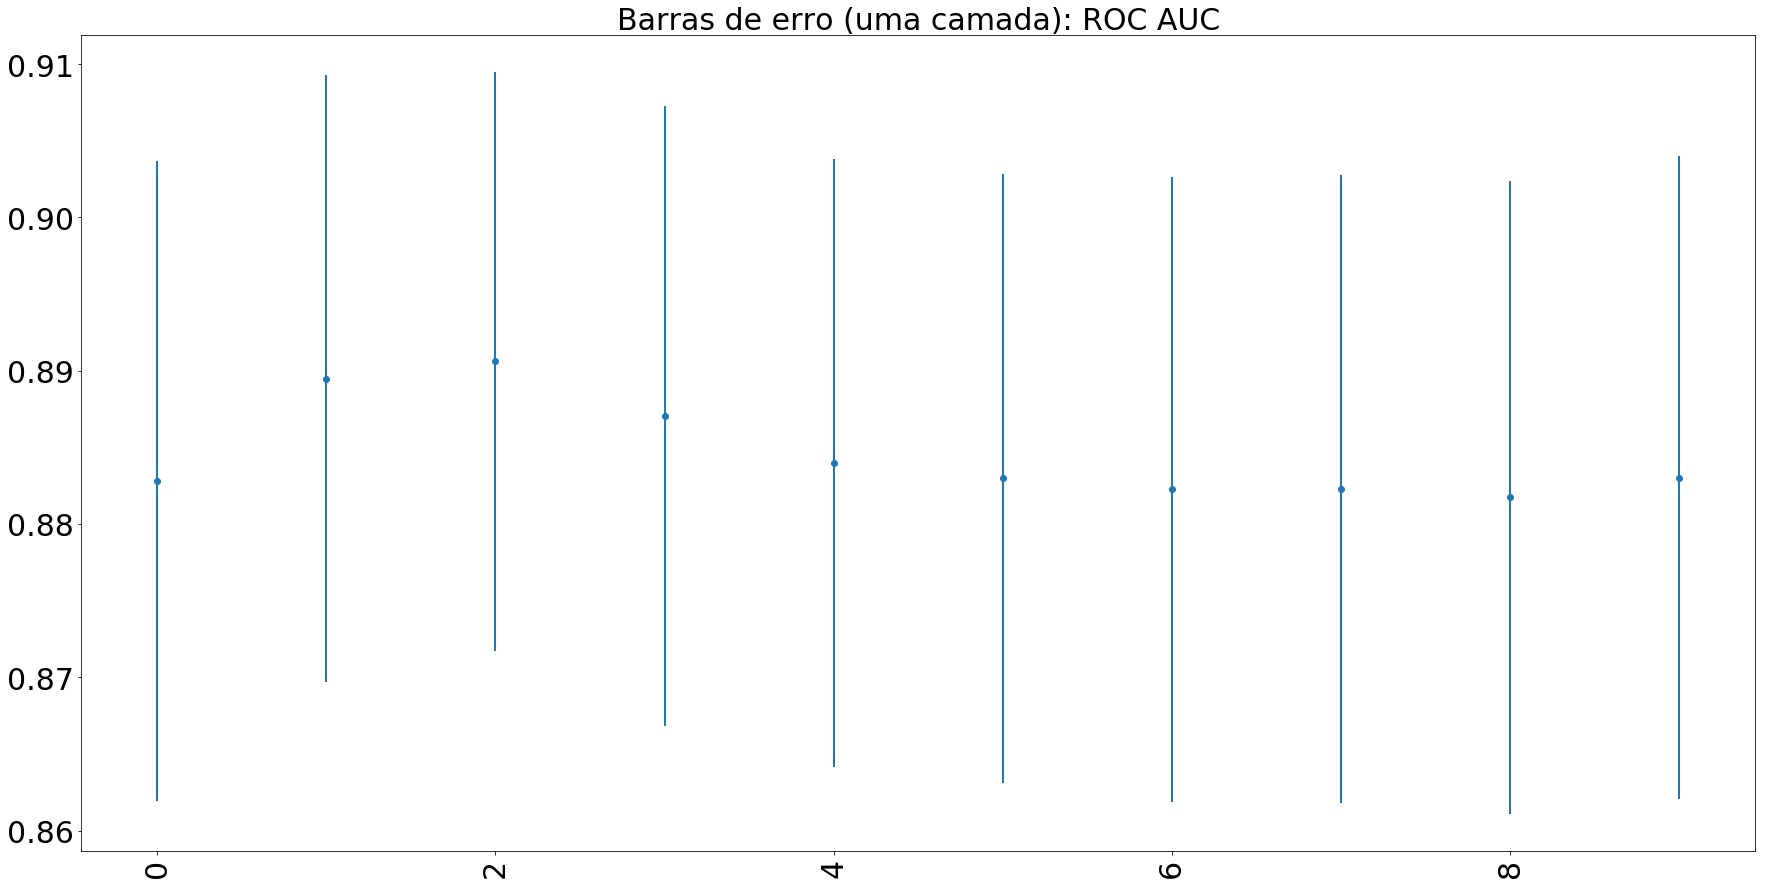

In [53]:
path_arquivos = 'Classificadores/Redes-neurais-MLP/'
str_balanceamento = 'desbalanceado'
fixed_param = 'param_alpha'
variable_param = 'param_hidden_layer_sizes'

results = pd.DataFrame(clf_one.cv_results_)
results.sort_values(by=[fixed_param, variable_param], axis=0, inplace=True)
# results.sort_values(by=['param_alpha', 'param_hidden_layer_sizes'], axis=0, inplace=True)

# results['param_hidden_layer_sizes'].head()

results_test = results.loc[:, 'split0_test_accuracy':'split9_train_roc_auc']
results_train = results_test.filter(regex=(".*train.*"))
results_test.drop(columns=results_train.columns,inplace=True)

lista_metricas = [('accuracy', 'acurácias'), ('average_precision', 'PRC AUC'), ('f1', 'F1 score'), ('precision', 'precisões'), ('recall', 'recall'), ('roc_auc', 'ROC AUC')]

for metrica in lista_metricas:

    results_test_filtered = results_test.filter(regex='.*_test_'+str(metrica[0])).transpose()

    fig = plt.figure(figsize=(30,15))

    plt.errorbar(results_test_filtered.columns, results_test_filtered.mean(), yerr=results_test_filtered.std(), fmt='o', lw=2)
    plt.title('Barras de erro (uma camada): ' + metrica[1], fontsize=30)
    plt.xticks(fontsize=30, rotation=90)
    plt.yticks(fontsize=30)
    plt.show()

[-6]
0
2


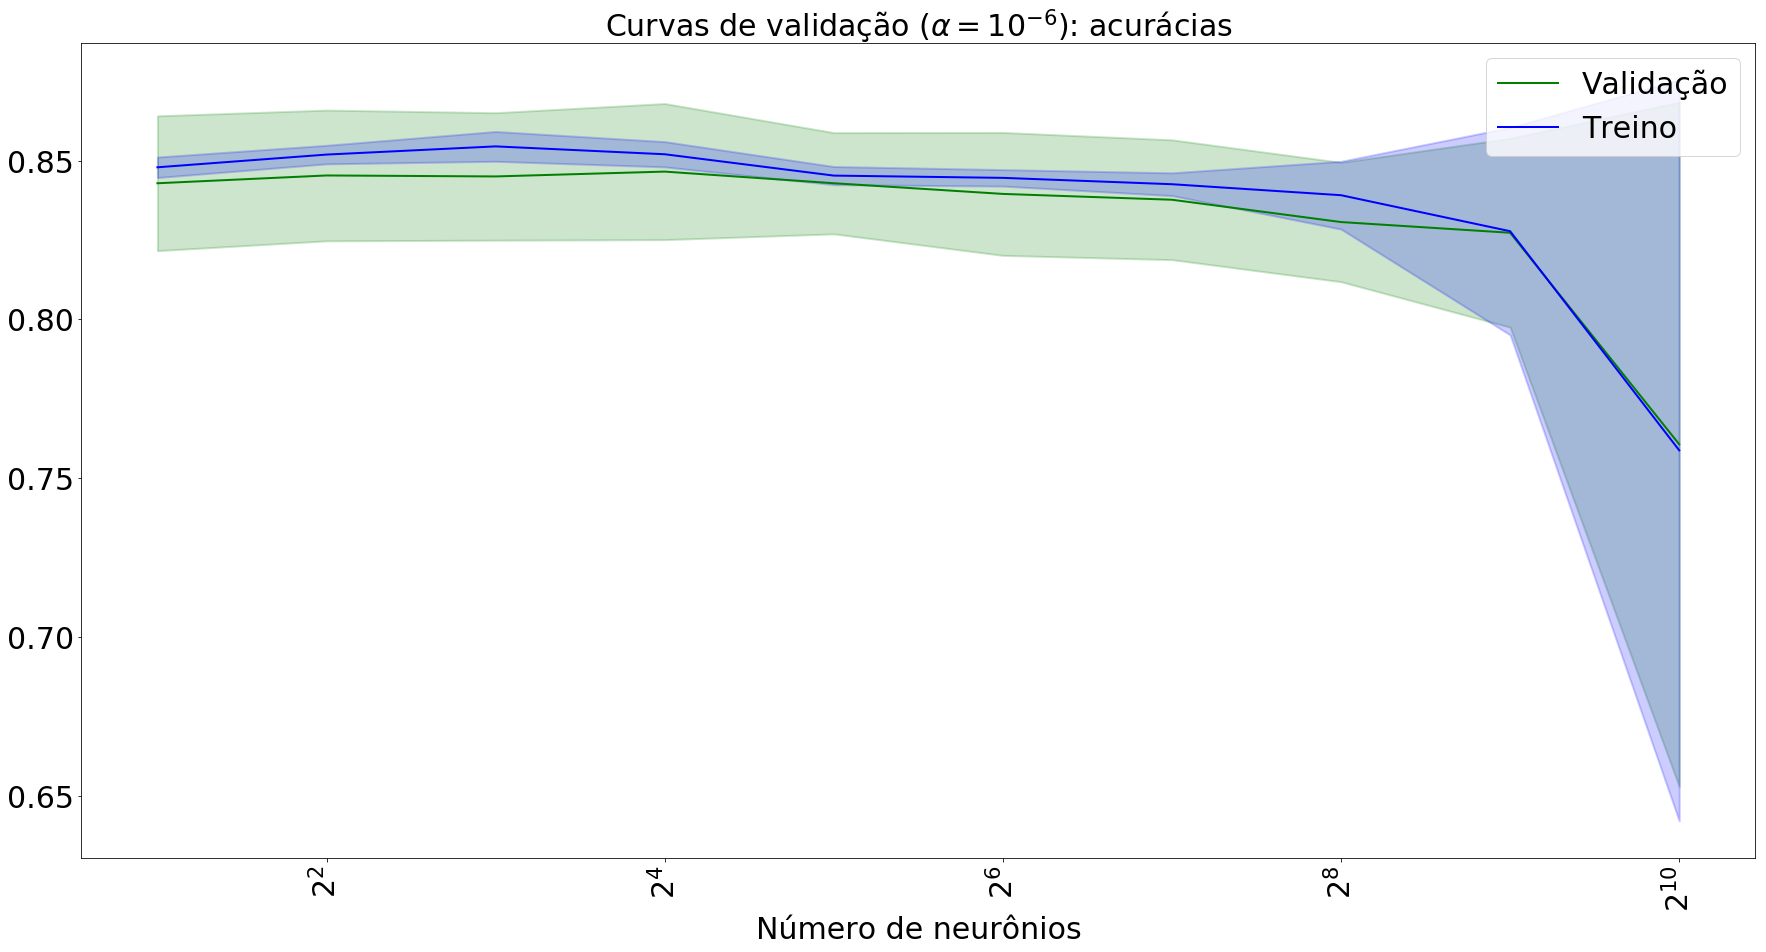

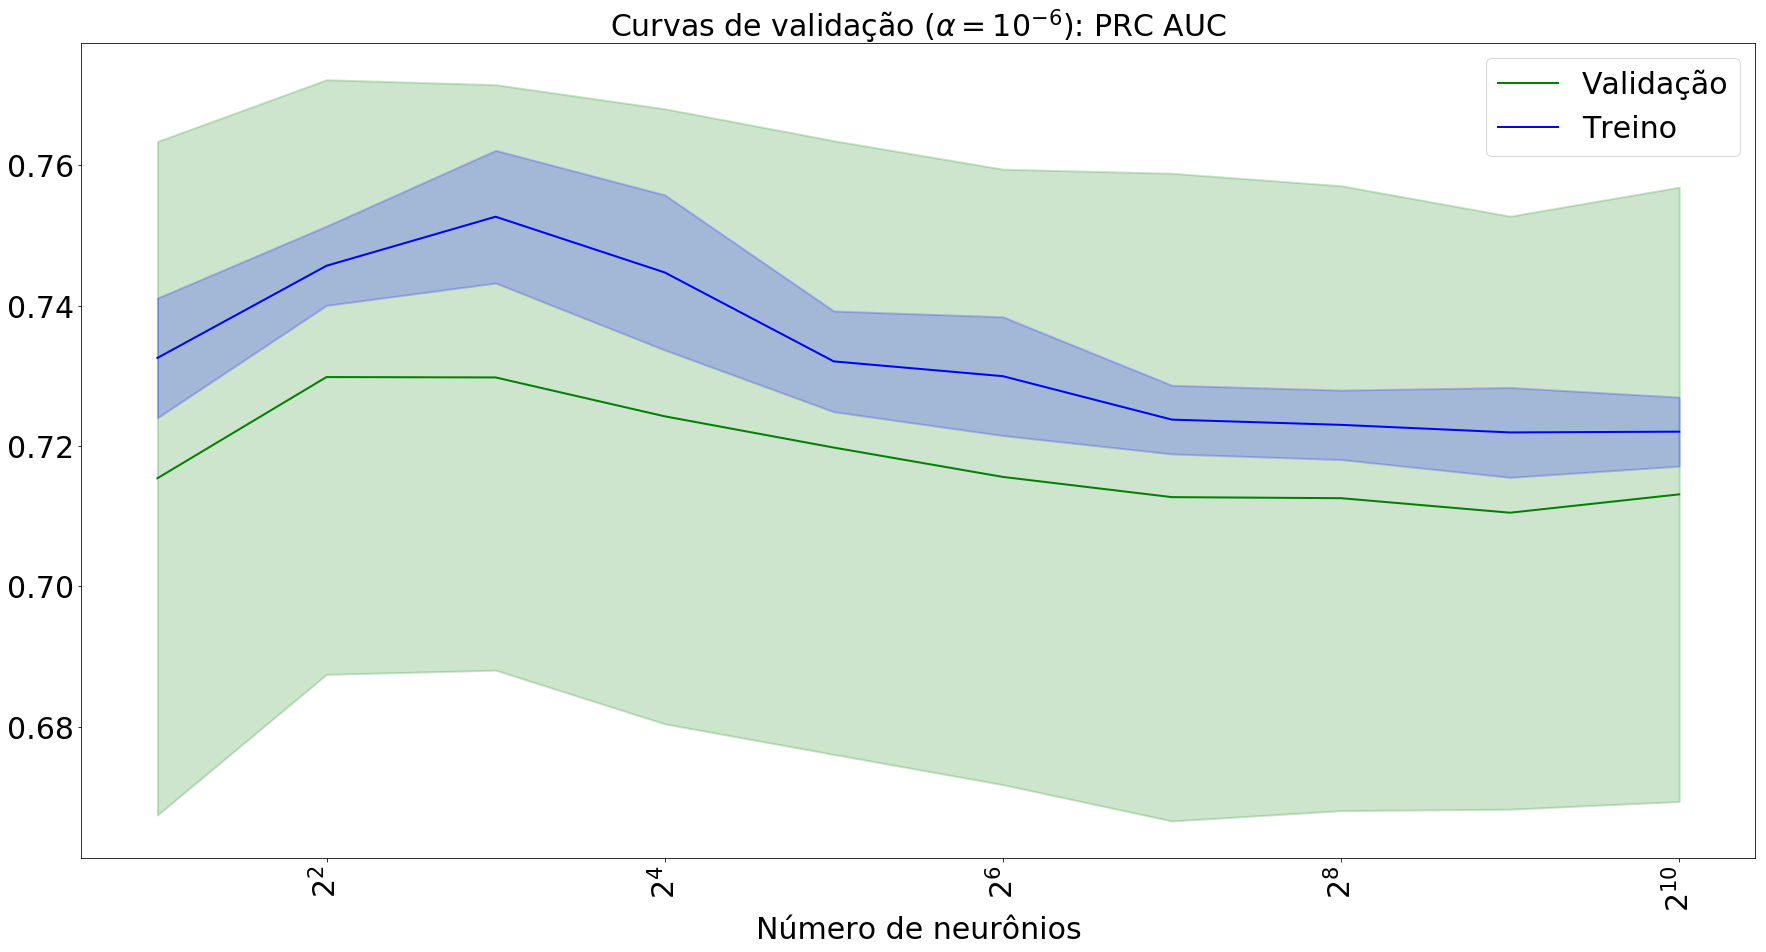

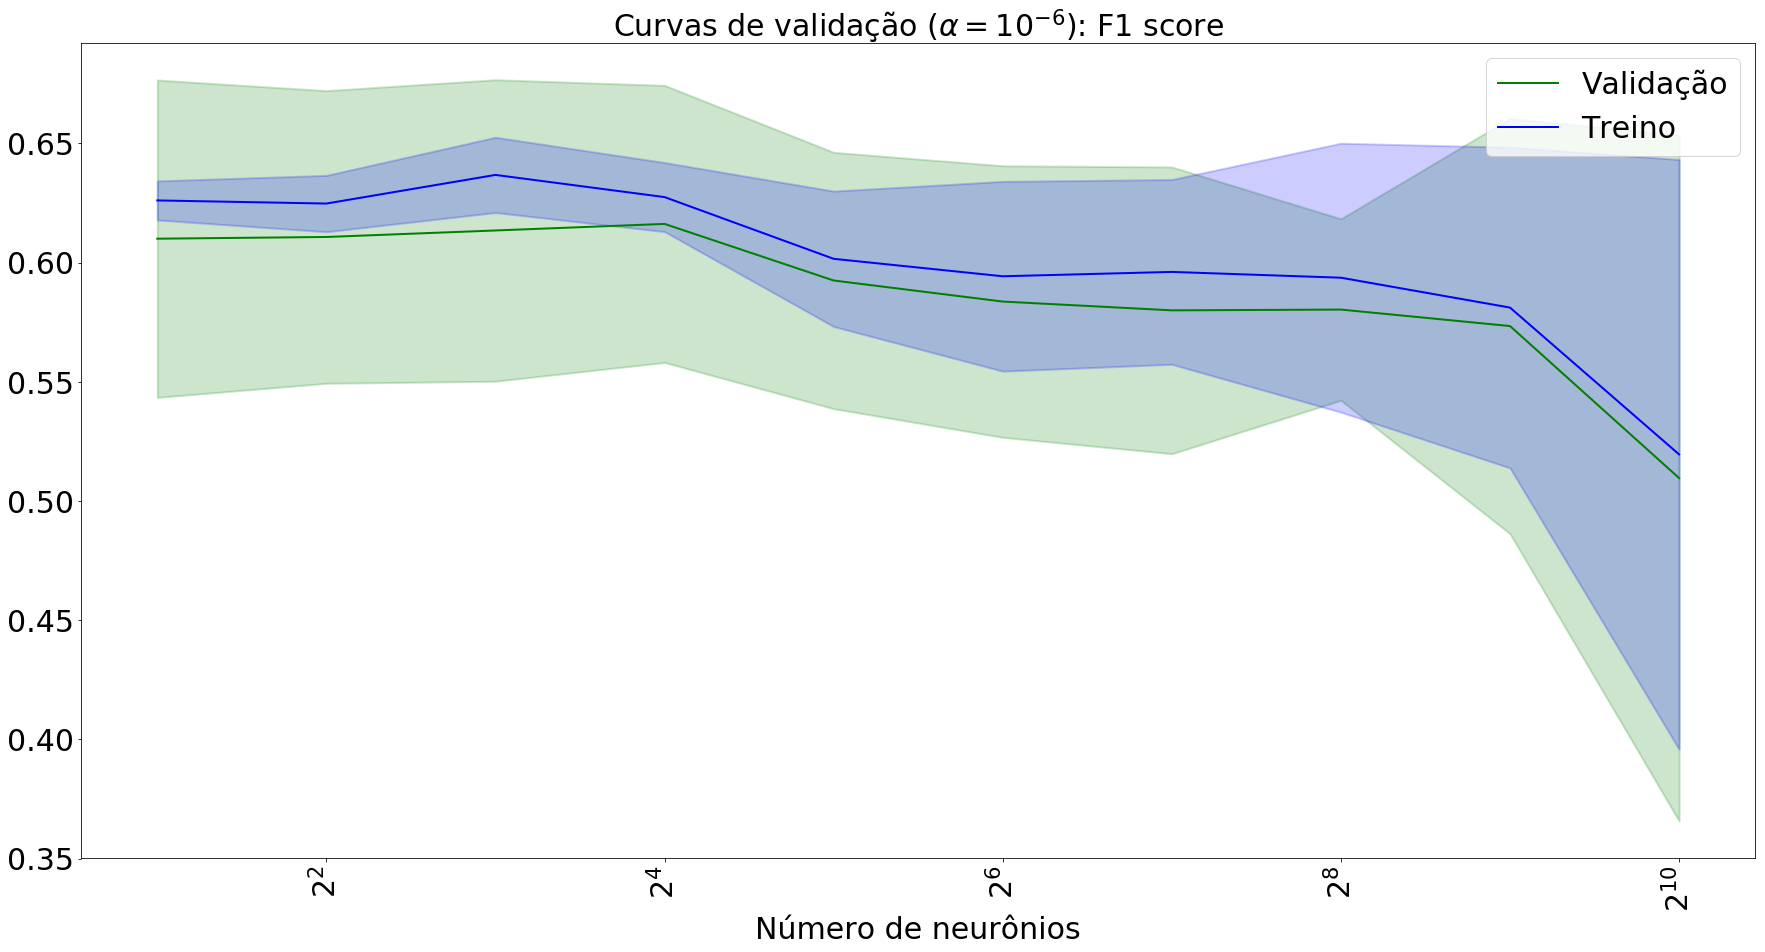

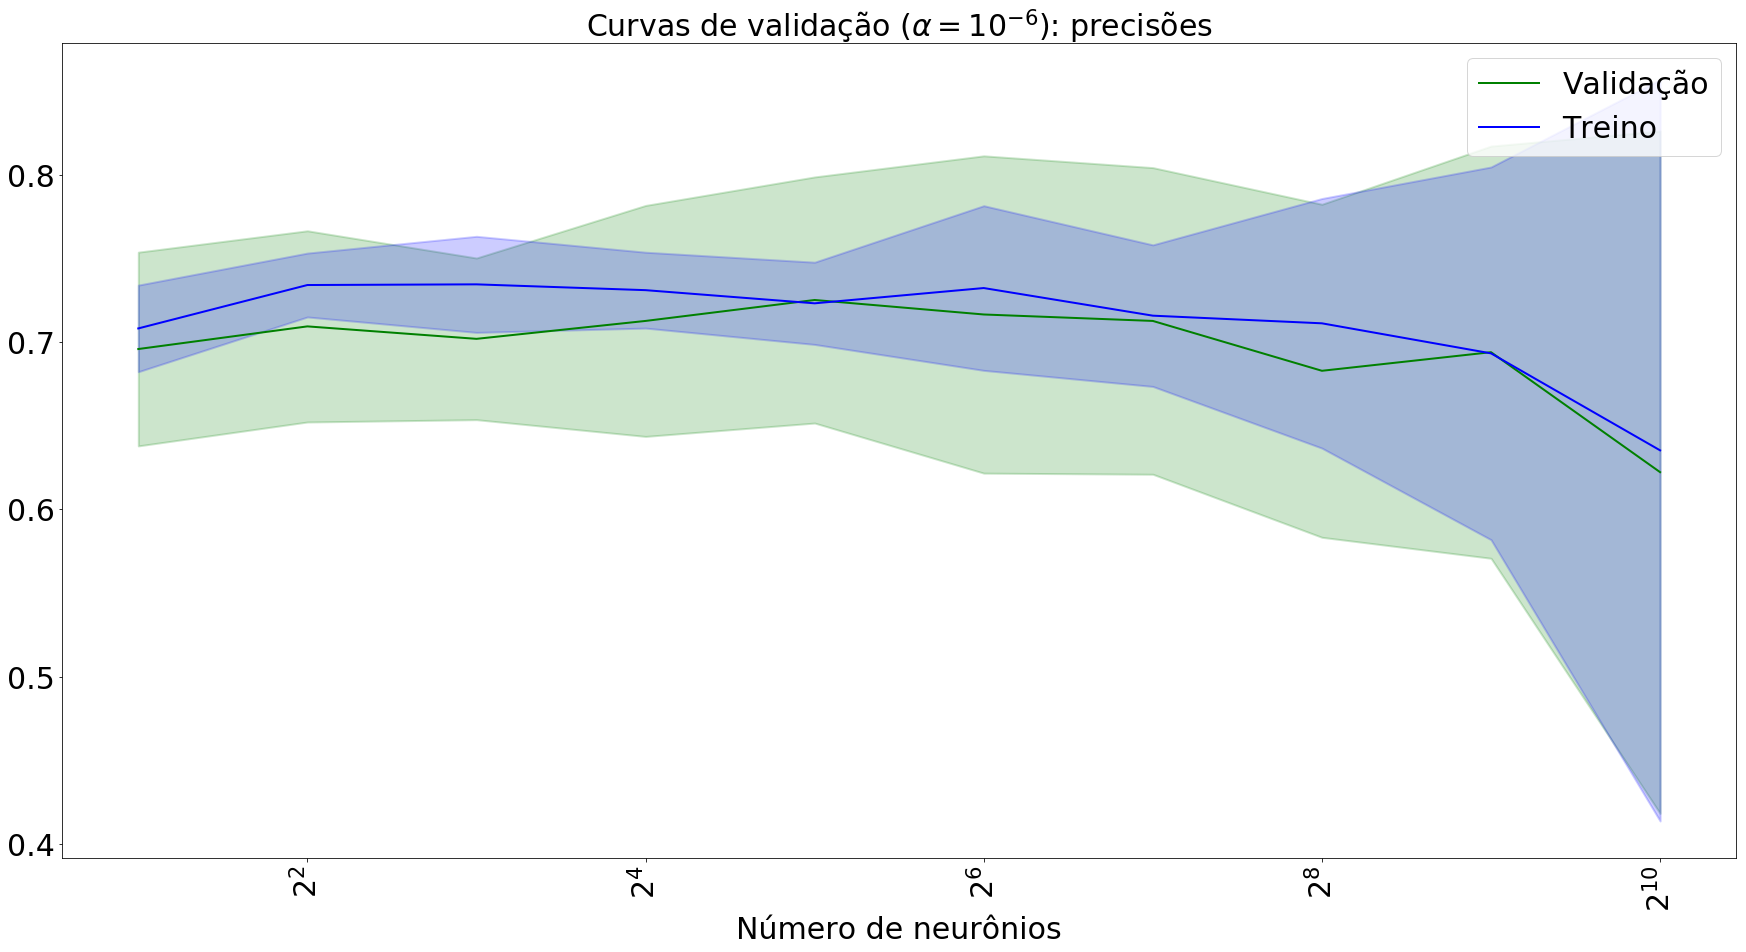

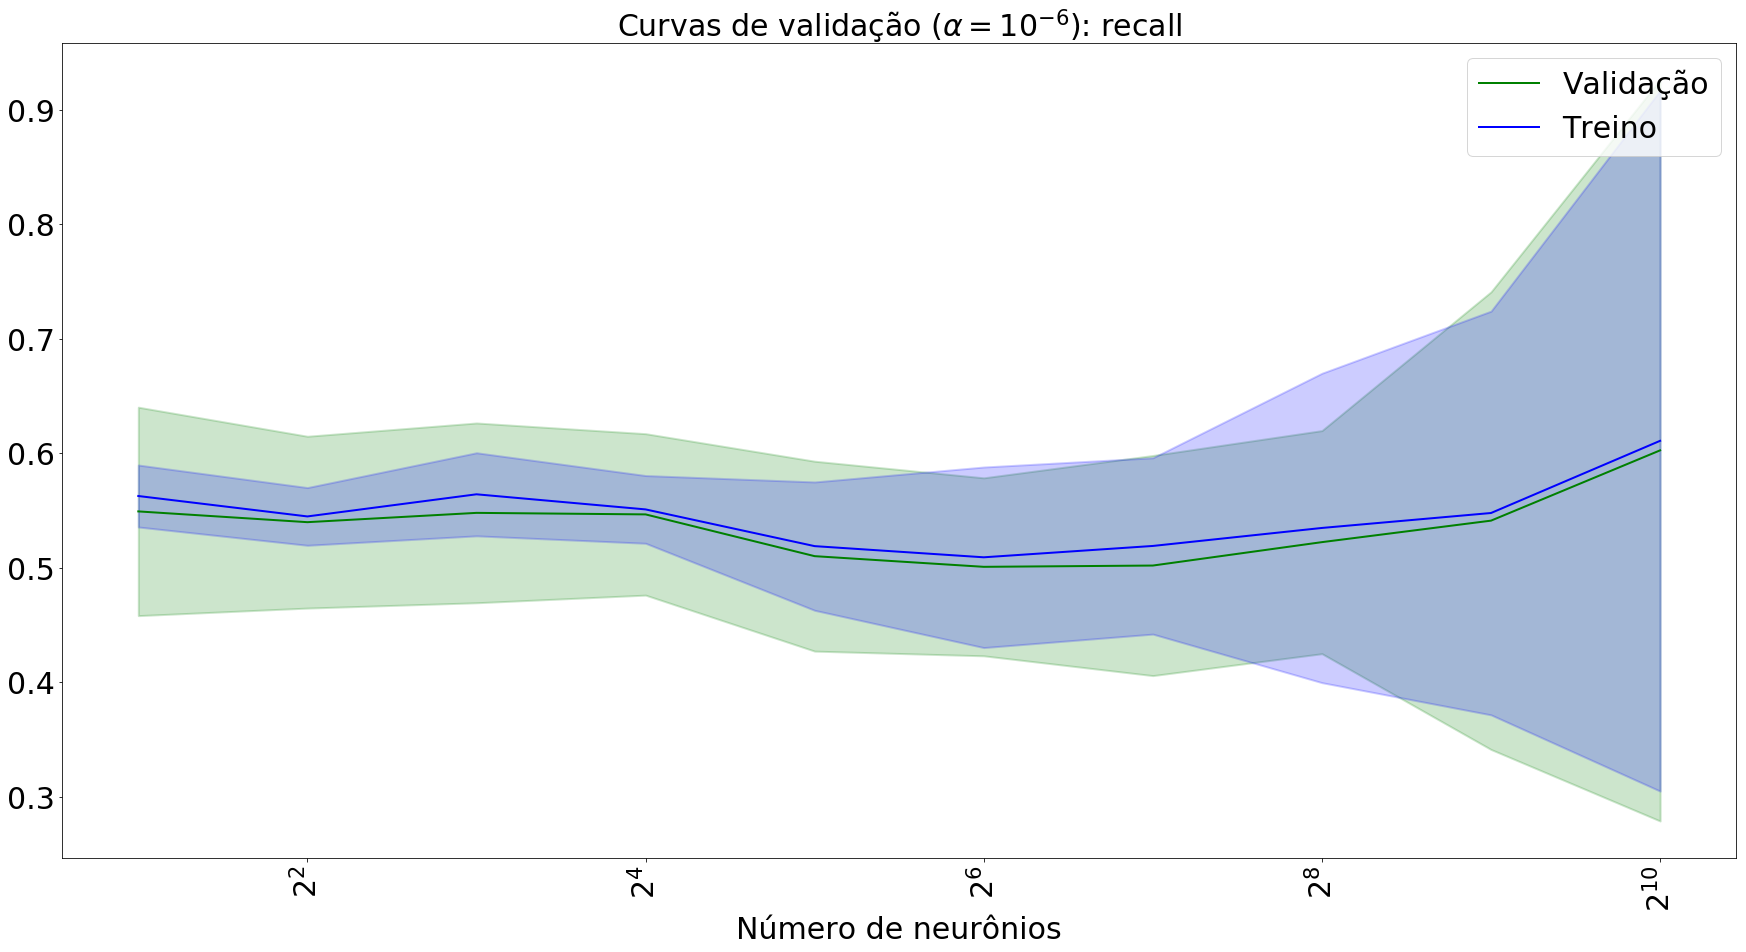

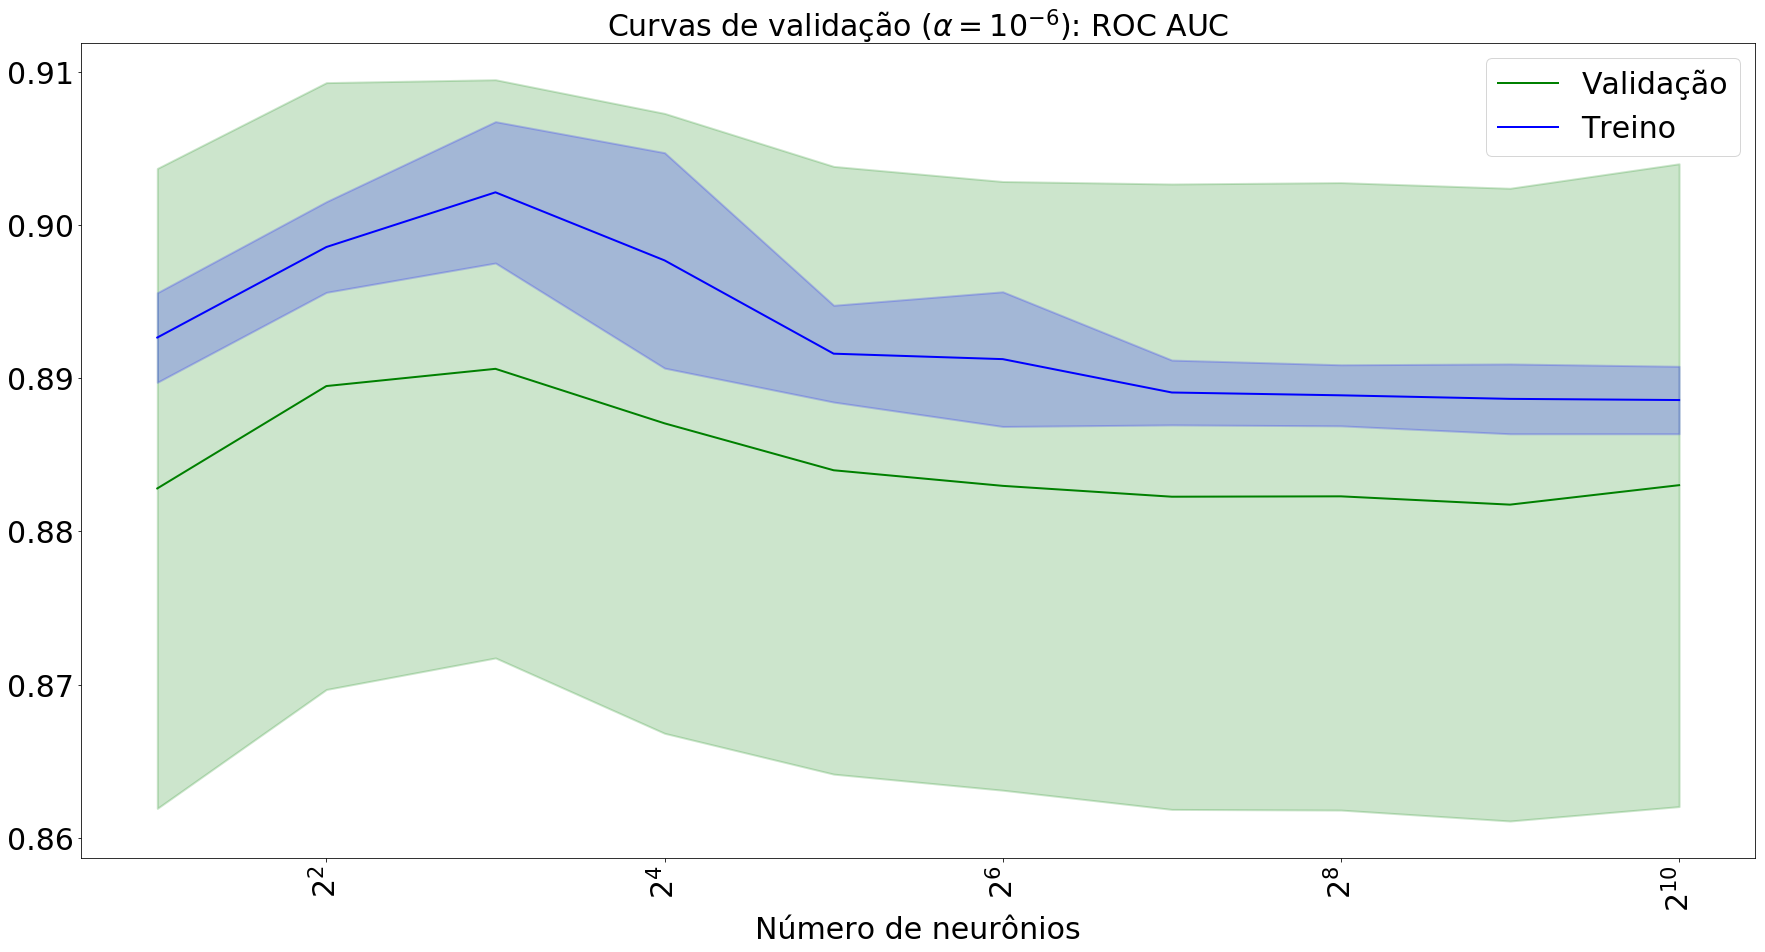

In [54]:
fixed_param_exp_values = [-6]

if fixed_param == 'param_alpha':
    
    fixed_param_exp_start_value = -6
    fixed_param_exp_end_value = -6
    fixed_param_base = 10
    fixed_param = 'alpha'
    
    variable_param = 'hidden_layer_sizes'
    variable_param_num_values = 10 
    variable_param_exp_start_value = 1
    variable_param_exp_end_value = 10
    variable_param_base = 2
    variable_param_values = np.logspace(start=variable_param_exp_start_value,stop=variable_param_exp_end_value,
                                        num=variable_param_num_values,base=variable_param_base)
    
    
elif fixed_param == 'param_hidden_layer_sizes':

    fixed_param_exp_start_value = -2
    fixed_param_exp_end_value = 17
    fixed_param_base = 2
    fixed_param = 'hidden_layer_sizes'
    
    variable_param = 'alpha'
    variable_param_num_values = 10 
    variable_param_exp_start_value = -16 
    variable_param_exp_end_value = -7
    variable_param_base = 2
    variable_param_values = np.logspace(start=variable_param_exp_start_value,stop=variable_param_exp_end_value,
                                        num=variable_param_num_values,base=variable_param_base)
    
fixed_param_exp_dict = dict((y,x) for x,y in enumerate(list(range(fixed_param_exp_start_value,fixed_param_exp_end_value+1))))
# print(fixed_param_exp_dict)

print(fixed_param_exp_values)

for fixed_param_exp_val in fixed_param_exp_values:
    
    print(fixed_param_exp_dict[fixed_param_exp_val])
    print(variable_param_base)
    
    # Localiza na tabela as colunas com as medidas resultantes correspondentes ao valor parâmetro fixo 
    # e aos valores dos parâmetro variável
    
    range_cols = [fixed_param_exp_dict[fixed_param_exp_val]*variable_param_num_values+i 
                  for i in range(0,variable_param_num_values)]
    
    for metrica in lista_metricas:

        results_test_filtered = results_test.filter(regex='.*_test_' + str(metrica[0])).transpose()
        results_train_filtered = results_train.filter(regex='.*_train_' + str(metrica[0])).transpose()
        
        results_test_filtered = results_test_filtered.iloc[:, range_cols]
        results_train_filtered = results_train_filtered.iloc[:, range_cols]

        fig = plt.figure(figsize=(30,15))
        plt.semilogx(variable_param_values, results_test_filtered.mean(), 
                     label='Validação', color='green', lw=2, basex=variable_param_base)
        
        plt.fill_between(variable_param_values, results_test_filtered.mean() - results_test_filtered.std(),
                     results_test_filtered.mean() + results_test_filtered.std(), alpha=0.2, color='green', lw=2)

        plt.semilogx(variable_param_values, results_train_filtered.mean(), 
                     label='Treino', color='blue', lw=2, basex=variable_param_base)
        
        plt.fill_between(variable_param_values, results_train_filtered.mean() - results_train_filtered.std(),
                     results_train_filtered.mean() + results_train_filtered.std(), alpha=0.2, color='blue', lw=2)
        
        if fixed_param == 'alpha':
            plot_title = 'Curvas de validação ($\\' + fixed_param + ' = ' + str(fixed_param_base) + '^{' + str(fixed_param_exp_val) + '}$): ' + metrica[1]
            plot_xlabel = 'Número de neurônios'
        elif fixed_param =='hidden_layer_sizes':
            plot_title = 'Curvas de validação ($' + fixed_param + ' = ' + str(fixed_param_base) + '^{' + str(fixed_param_exp_val) + '}$): ' + metrica[1]
            plot_xlabel = '$\alpha$'
        
        plt.title(plot_title, fontsize=30)
        plt.xticks(fontsize=30, rotation=90)
        plt.xlabel(plot_xlabel, fontsize=30)
        plt.yticks(fontsize=30)
        plt.legend(loc='best', fontsize=30)
        
#         filename_graficos = 'mlp-abordagem-2-'+str_balanceamento+'-curvas_validacao-'+variable_param+'-'+str(metrica[0])+'.png'
#         plt.savefig(path_graficos+filename_graficos)
        
        plt.show()

In [18]:
from sklearn.neural_network import MLPClassifier as NN

clf_nn = NN(hidden_layer_sizes=100,max_iter=2000)

In [19]:
clf_nn.fit(conjunto1_train,conjunto1_train_target)
prediction_conjunto1 = clf_nn.predict(conjunto1_test)
print('Acurácia para o conjunto 1: {:.2f}'.format(accuracy_score(conjunto1_test_target,prediction_conjunto1,normalize=True)))

clf_nn.fit(conjunto2_train,conjunto2_train_target)
prediction_conjunto2 = clf_nn.predict(conjunto2_test)
print('Acurácia para o conjunto 2: {:.2f}'.format(accuracy_score(conjunto2_test_target,prediction_conjunto2,normalize=True)))

clf_nn.fit(conjunto3_train,conjunto3_train_target)
prediction_conjunto3 = clf_nn.predict(conjunto3_test)
print('Acurácia para o conjunto 3: {:.2f}'.format(accuracy_score(conjunto3_test_target,prediction_conjunto3,normalize=True)))

clf_nn.fit(conjunto4_train,conjunto4_train_target)
prediction_conjunto4 = clf_nn.predict(conjunto4_test)
print('Acurácia para o conjunto 4: {:.2f}'.format(accuracy_score(conjunto4_test_target,prediction_conjunto4,normalize=True)))

Acurácia para o conjunto 1: 0.84
Acurácia para o conjunto 2: 0.80
Acurácia para o conjunto 3: 0.84
Acurácia para o conjunto 4: 0.82


### Cenários para os datasets balanceados

### Dataset 1

In [20]:
validation_graph_acc(model=NN(max_iter=4000,activation='logistic'),X=conjunto1_train,y=conjunto1_train_target,hyperparameter='hidden_layer_sizes',
                 grid_search=list(range(10,30,10)),k_folds=10,score='accuracy',jobs=-1)

Process ForkPoolWorker-23:
Process ForkPoolWorker-21:


KeyboardInterrupt: 

In [ ]:
cross_val_bal_1 = cross_val_score(NN(hidden_layer_sizes=100,max_iter=4000,activation='logistic'),conjunto1_test,conjunto1_test_target,cv=10,scoring='accuracy')
print(cross_val_bal_1)

### Dataset 2

In [ ]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=NN(max_iter=4000,activation='logistic'),X=conjunto1_train,y=conjunto1_train_target,hyperparameter='hidden_layer_sizes',
                 grid_search=list(range(10,150,10)),k_folds=10,score='accuracy',jobs=-1)

In [ ]:
cross_val_bal_2 = cross_val_score(NN(hidden_layer_sizes=,max_iter=4000,activation='logistic'),conjunto2_test,conjunto2_test_target,cv=10,scoring='accuracy')
print(cross_val_bal_2)

### Dataset 3

In [ ]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=NN(max_iter=4000,activation='logistic'),X=conjunto1_train,y=conjunto1_train_target,hyperparameter='hidden_layer_sizes',
                 grid_search=list(range(10,150,10)),k_folds=10,score='accuracy',jobs=-1)

In [ ]:
cross_val_bal_2 = cross_val_score(NN(hidden_layer_sizes=,max_iter=4000,activation='logistic'),conjunto3_test,conjunto3_test_target,cv=10,scoring='accuracy')
print(cross_val_bal_2)

### Dataset 4



In [ ]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=NN(activation='logistic'),X=conjunto1_train,y=conjunto1_train_target,hyperparameter='hidden_layer_sizes',
                 grid_search=list(range(10,150,10)),k_folds=10,score='accuracy',jobs=-1)

In [ ]:
cross_val_bal_4 = cross_val_score(NN(hidden_layer_sizes=,max_iter=4000,activation='logistic'),conjunto4_test,conjunto4_test_target,cv=10,scoring='accuracy')
print(cross_val_bal_2)

### Avaliação dos modelos para cada cenário

In [ ]:
modelos_balanceados = [cross_val_bal_1, cross_val_bal_2, cross_val_bal_3, cross_val_bal_4]
labels = ['n = 20, Dataset 1', 'n = 25, Dataset 2', 'n = 55, Dataset 3', 'n= 40, Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_balanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Max_depth = 25',fontsize=15)
plt.ylabel('Acurácia')
plt.show()

### Cenários para os datasets desbalanceado

In [ ]:
# Teste base
clf_nn.fit(conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado)
prediction_conjunto1 = clf_nn.predict(conjunto1_test_desbalanceado)
print('F1 para o conjunto 1: {:.2f}'.format(f1_score(conjunto1_test_target_desbalanceado,prediction_conjunto1)))
print('ROC AUC para o conjunto 1: {:.2f}'.format(roc_auc_score(conjunto1_test_target_desbalanceado,prediction_conjunto1)))
print()

clf_nn.fit(conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado)
prediction_conjunto2 = clf_nn.predict(conjunto2_test_desbalanceado)
print('F1 para o conjunto 2: {:.2f}'.format(f1_score(conjunto2_test_target_desbalanceado,prediction_conjunto2)))
print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target_desbalanceado,prediction_conjunto2)))
print()

clf_nn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado)
prediction_conjunto3 = clf_nn.predict(conjunto3_test_desbalanceado)
print('F1 para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado,prediction_conjunto3)))
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado,prediction_conjunto3)))
print()

clf_nn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado)
prediction_conjunto4 = clf_nn.predict(conjunto4_test_desbalanceado)
print('F1 para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado,prediction_conjunto4)))
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado,prediction_conjunto4)))

### Dataset 1

#### F1-Score

In [ ]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [ ]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

#### ROC-AUC

In [ ]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [ ]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

### Dataset 2

#### F1-Score

In [ ]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [ ]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

#### ROC-AUC

In [ ]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [ ]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

### Dataset 3

#### F1-Score

In [ ]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [ ]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

#### ROC-AUC

In [ ]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [ ]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

### Dataset 4

#### F1-Score

In [ ]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [ ]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

#### ROC-AUC

In [ ]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [ ]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

### Avaliação dos modelos para cada cenário

In [ ]:
modelos_desbalanceados = [cross_val_desbal_f1_1, cross_val_desbal_f1_2, cross_val_desbal_f1_3, cross_val_desbal_f1_4]
labels = ['RF = , Dataset 1', 'RF = , Dataset 2', 'RF = , Dataset 3', 'RF = , Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_desbalanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('F1-Score')
plt.show()

In [ ]:
modelos_desbalanceados = [cross_val_desbal_roc_1, cross_val_desbal_roc_2, cross_val_desbal_roc_3, cross_val_desbal_roc_4]
labels = ['RF = , Dataset 1', 'RF = , Dataset 2', 'RF = , Dataset 3', 'RF = , Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_desbalanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('F1-Score')
plt.show()